# Udacity ML - Regression
Notes on Machine Learning and regression based on Udacity's Introduction to Machine Learning Course.

This notebook contains code used to answer the video lecture quizzes.

#### Regression
Regression is different from classification in the sense that the expected outputs are no longer descrete but continuous.  For example, instead of identifying a fish species (descrete) using attributes such as fin shape and color, regression aims to predict a fishes weight (continuous) based on age and species.

#### The Data Set
The data set being used is based on the [Enron scandal]('https://en.wikipedia.org/wiki/Enron_scandal) and is structured as nested dictionaries containing persons of interest and associated attributes.  The quiz questions are focused around attempting to predict a persons bonus based on other attributes such as salary using regression.

##### Load and split the data set

In [1]:
import sys
import numpy as np
import pickle


sys.path.append("../tools/")
from feature_format import featureFormat, targetFeatureSplit

#load the data
dictionary = pickle.load( open("../final_project/final_project_dataset_modified.pkl", "r") )

#split the data for target and features
features_list = ["bonus", "salary"]
data = featureFormat( dictionary, features_list, remove_any_zeroes=True)
target, features = targetFeatureSplit( data )


#split the data in to training and testing data
from sklearn.cross_validation import train_test_split
feature_train, feature_test, target_train, target_test = train_test_split(features,
                                                                          target, test_size=0.5, random_state=42)
train_color = "b"
test_color = "r"

##### Plot the data

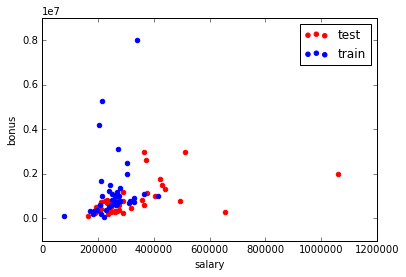

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline


for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")
plt.legend()

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

### Ordinary Least Squares
[Scikit Learn](http://scikit-learn.org/stable/modules/linear_model.html#ordinary-least-squares) page on Ordinary Least Squares

[Wiki](https://en.wikipedia.org/wiki/Ordinary_least_squares) page on Ordinary Least Squares 

Ordinary Least Squares is a generalized linear model, meaning it assumes a linear relation between the variables and attempts to fit the data by minimizing the sum of squared errors (SSE).  It should be noted though that the SSE approach is not perfect; two data sets with the same linear relation may produce different SSE values simply due to the fact one contains more data points than the other.

To avoid possible issues with the SSE metric, the [R Squared](https://en.wikipedia.org/wiki/Coefficient_of_determination) value is usually used which provides insight in to how much of the change in output (y) is explained by the change in input (x).  The value has a range from 0 to 1 and is independent of the number of data points.  The larger the value the better the model is said to fit the data.  For example, an R squared value of 0.5 explains 50% of the variation in the data, while a value of 0.8 explains 80%.

Note that it is possible to have R Squared values that are negative.  This occurs when the model does a worse job of fitting the data than a simple horizontal line.

##### Train the model

Train the linear model and plot the result on the data:

In [3]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(feature_train, target_train)
pred = reg.predict(feature_test)

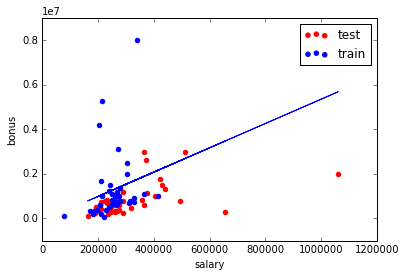

In [4]:
for feature, target in zip(feature_test, target_test):
    plt.scatter( feature, target, color=test_color ) 
for feature, target in zip(feature_train, target_train):
    plt.scatter( feature, target, color=train_color ) 

plt.scatter(feature_test[0], target_test[0], color=test_color, label="test")
plt.scatter(feature_test[0], target_test[0], color=train_color, label="train")

plt.plot(feature_test, reg.predict(feature_test))

plt.xlabel(features_list[1])
plt.ylabel(features_list[0])
plt.legend()
plt.show()

As can be seen, the model does not do a very good job of fitting the data.  In particular the outliers are causing issues.

##### Quiz Answers

In [5]:
#find the slope and intercept of the line
print('The coefficient or slope of the linear regression is: ', reg.coef_)
print('The intercept of the linear regression is: ', reg.intercept_)

('The coefficient or slope of the linear regression is: ', array([ 5.44814029]))
('The intercept of the linear regression is: ', -102360.54329388007)


In [6]:
#find the 'score' or R^2 value by comparing the training data to the target values
#note this is NOT the proper way, should compared with data not used in training
print('The score of the linear fit is: ', reg.score(feature_train,target_train))

('The score of the linear fit is: ', 0.045509192699524359)


In [7]:
#find the true R^2 value by comparing the test features and test targets
print('The score of the linear fit is: ', reg.score(feature_test, target_test))

('The score of the linear fit is: ', -1.484992417368511)


### Now run the code above for Long Term Incentive vs Bonus

##### Load, split, and plot the data

In [8]:
features_list2 = ["bonus", "long_term_incentive"]
data2 = featureFormat( dictionary, features_list2, remove_any_zeroes=True)
target2, features2 = targetFeatureSplit( data2 )

#split the data
from sklearn.cross_validation import train_test_split
feature_train2, feature_test2, target_train2, target_test2 = train_test_split(features2, target2, test_size=0.5,
                                                                              random_state=42)
train_color = "b"
test_color = "r"

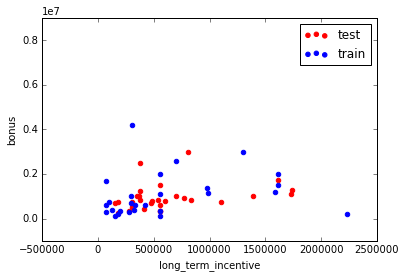

In [9]:
for feature2, target2 in zip(feature_test2, target_test2):
    plt.scatter( feature2, target2, color=test_color ) 
for feature2, target2 in zip(feature_train2, target_train2):
    plt.scatter( feature2, target2, color=train_color ) 
    
plt.scatter(feature_test2[0], target_test2[0], color=test_color, label="test")
plt.scatter(feature_test2[0], target_test2[0], color=train_color, label="train")   

plt.xlabel(features_list2[1])
plt.ylabel(features_list2[0])
plt.legend()
plt.show()

#### Train the model

In [10]:
from sklearn import linear_model
reg2 = linear_model.LinearRegression()
reg2.fit(feature_train2, target_train2)
pred2 = reg.predict(feature_test2)

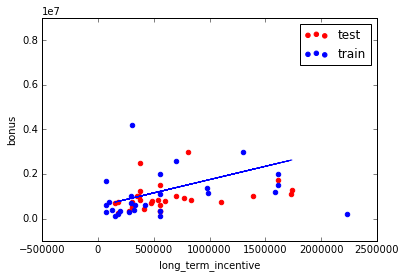

In [11]:
for feature2, target2 in zip(feature_test2, target_test2):
    plt.scatter( feature2, target2, color=test_color ) 
for feature2, target2 in zip(feature_train2, target_train2):
    plt.scatter( feature2, target2, color=train_color ) 

plt.scatter(feature_test2[0], target_test2[0], color=test_color, label="test")
plt.scatter(feature_test2[0], target_test2[0], color=train_color, label="train")

plt.plot( feature_test2, reg2.predict(feature_test2) )

plt.xlabel(features_list2[1])
plt.ylabel(features_list2[0])
plt.legend()
plt.show()

In [12]:
#find the true R^2 value
print('The score of the linear fit is for LTI vs Bonus is: ', reg2.score(feature_test2, target_test2))

('The score of the linear fit is for LTI vs Bonus is: ', -0.59271289994986431)


Here, it is obvious that the 'long term incentive' feature is much better at predicting a persons bonus.